In [1]:
import torch
import sys
sys.path.append('/mnt/data/th')


In [2]:
from FedML.fedml_api.data_preprocessing.cifar10.data_loader import get_client_idxes_dict, get_client_dataloader
dict_client_idexes, class_num, client_infos = get_client_idxes_dict("/mnt/data/th/FedTH/data/dataset/cifar10/", "hetero", 0.1, 10)

INFO:root:*********partition data***************
INFO:root:N = 50000
INFO:root:traindata_cls_counts = {0: {0: 304, 1: 134, 2: 158, 7: 4498}, 1: {1: 295, 2: 1, 3: 297, 4: 294, 5: 4522}, 2: {1: 24, 5: 1, 7: 8, 8: 16, 9: 2175}, 3: {1: 97, 2: 1, 4: 4325, 5: 1, 6: 1, 8: 2933}, 4: {0: 1351, 1: 59, 2: 3704}, 5: {1: 103, 3: 3269, 4: 88, 5: 95, 6: 1, 8: 80, 9: 2824}, 6: {1: 3006, 2: 943, 3: 2, 7: 493, 8: 1162}, 7: {0: 2909, 1: 1263, 2: 188, 4: 246, 5: 380, 6: 150}, 8: {0: 435, 1: 18, 4: 6, 6: 4821}, 9: {0: 1, 1: 1, 2: 5, 3: 1432, 4: 41, 5: 1, 6: 27, 7: 1, 8: 809, 9: 1}}
INFO:root:total data num = 50000


In [7]:
res = []
for key,value in client_infos.items():
    for label in range(10):
        if label in value:
            res.append((key,label,value[label]))
        else:
            res.append((key,label,0))

In [8]:
res

[(0, 0, 139),
 (0, 1, 544),
 (0, 2, 21),
 (0, 3, 3),
 (0, 4, 0),
 (0, 5, 279),
 (0, 6, 291),
 (0, 7, 1),
 (0, 8, 208),
 (0, 9, 4243),
 (1, 0, 548),
 (1, 1, 0),
 (1, 2, 218),
 (1, 3, 96),
 (1, 4, 0),
 (1, 5, 2579),
 (1, 6, 1445),
 (1, 7, 1057),
 (1, 8, 0),
 (1, 9, 0),
 (2, 0, 7),
 (2, 1, 6),
 (2, 2, 1),
 (2, 3, 359),
 (2, 4, 2183),
 (2, 5, 7),
 (2, 6, 18),
 (2, 7, 62),
 (2, 8, 0),
 (2, 9, 18),
 (3, 0, 7),
 (3, 1, 2357),
 (3, 2, 510),
 (3, 3, 1486),
 (3, 4, 542),
 (3, 5, 1),
 (3, 6, 732),
 (3, 7, 0),
 (3, 8, 0),
 (3, 9, 0),
 (4, 0, 210),
 (4, 1, 1),
 (4, 2, 1502),
 (4, 3, 0),
 (4, 4, 4),
 (4, 5, 121),
 (4, 6, 383),
 (4, 7, 381),
 (4, 8, 2),
 (4, 9, 729),
 (5, 0, 15),
 (5, 1, 1),
 (5, 2, 1667),
 (5, 3, 21),
 (5, 4, 1131),
 (5, 5, 514),
 (5, 6, 656),
 (5, 7, 7),
 (5, 8, 2388),
 (5, 9, 0),
 (6, 0, 261),
 (6, 1, 235),
 (6, 2, 34),
 (6, 3, 5),
 (6, 4, 1083),
 (6, 5, 136),
 (6, 6, 1468),
 (6, 7, 53),
 (6, 8, 2400),
 (6, 9, 0),
 (7, 0, 1408),
 (7, 1, 6),
 (7, 2, 1044),
 (7, 3, 11),
 (7, 4, 56),

In [3]:
import pandas
df  = pandas.DataFrame(client_infos)

In [11]:
# df.columns = ['client_id','label','number']

In [4]:
df.fillna(0)

,0,1,2,3,4,5,6,7,8,9
0,304.0,0.0,0.0,0.0,1351.0,0.0,0.0,2909.0,435.0,1
1,134.0,295.0,24.0,97.0,59.0,103.0,3006.0,1263.0,18.0,1
2,158.0,1.0,0.0,1.0,3704.0,0.0,943.0,188.0,0.0,5
7,4498.0,0.0,8.0,0.0,0.0,0.0,493.0,0.0,0.0,1
3,0.0,297.0,0.0,0.0,0.0,3269.0,2.0,0.0,0.0,1432
4,0.0,294.0,0.0,4325.0,0.0,88.0,0.0,246.0,6.0,41
5,0.0,4522.0,1.0,1.0,0.0,95.0,0.0,380.0,0.0,1
8,0.0,0.0,16.0,2933.0,0.0,80.0,1162.0,0.0,0.0,809
9,0.0,0.0,2175.0,0.0,0.0,2824.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150.0,4821.0,27


In [13]:
df.groupby("label")

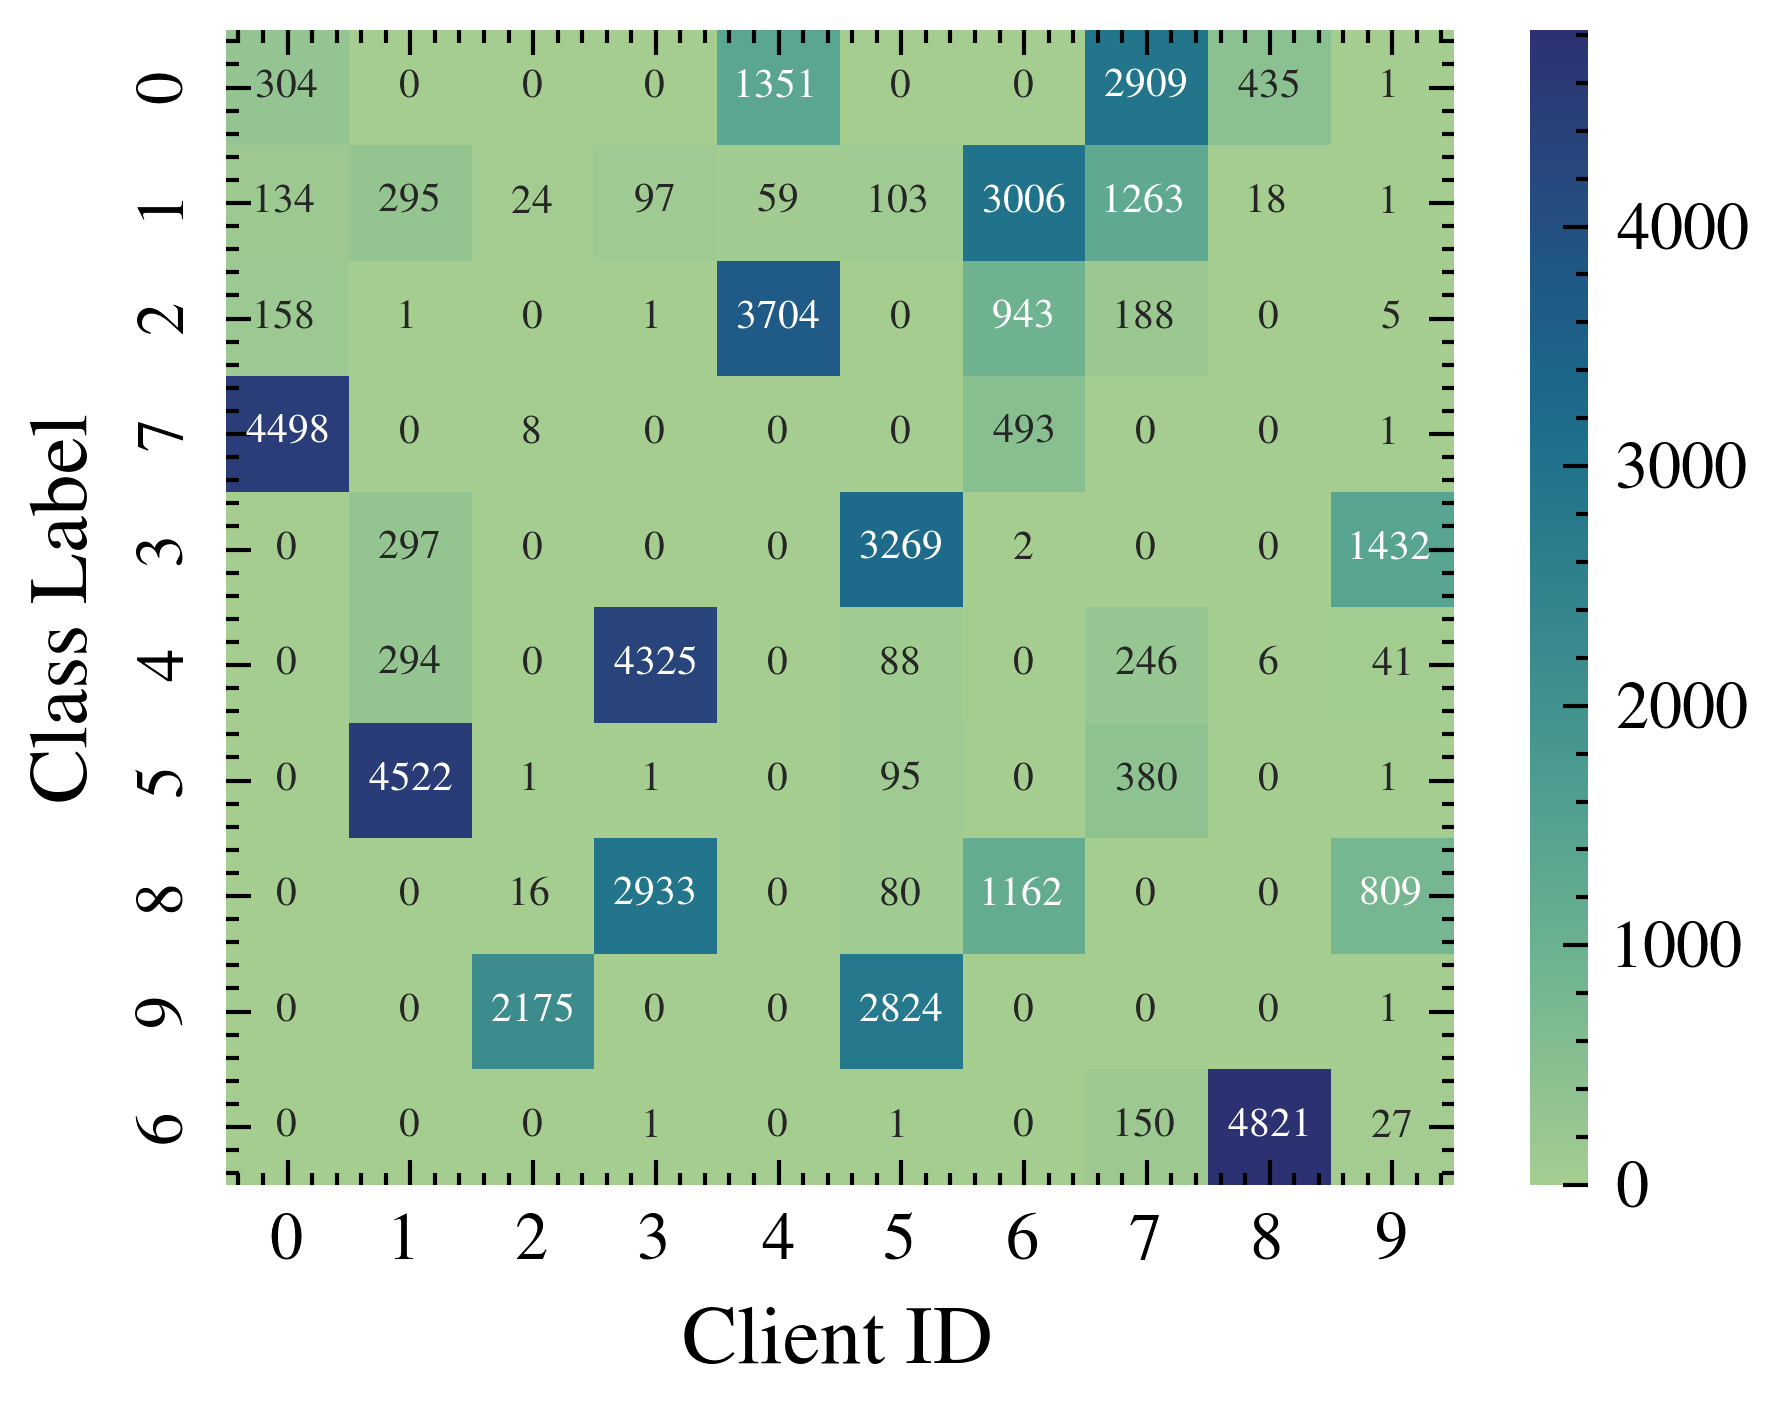

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['science','ieee','retro'])
import os

# fig, ax = plt.subplots()
# ax.set_xlabel()
# ax.set_ylabel('Per-Class Acc(\%)')
s = sns.heatmap(data=df.fillna(0),annot=True,annot_kws={'size':5},fmt='g',cmap="crest")
s.set_xlabel('Client ID', fontsize=10)
s.set_ylabel('Class Label', fontsize=10)
plt.savefig(os.path.join("../saved/")+"infos_clients_01.pdf",dpi = 300)
plt.show()

In [17]:
df_temp = df[0].fillna(0).sort_values(ascending=False)
df_temp

7    4498.0
0     304.0
2     158.0
1     134.0
3       0.0
4       0.0
5       0.0
8       0.0
9       0.0
6       0.0
Name: 0, dtype: float64

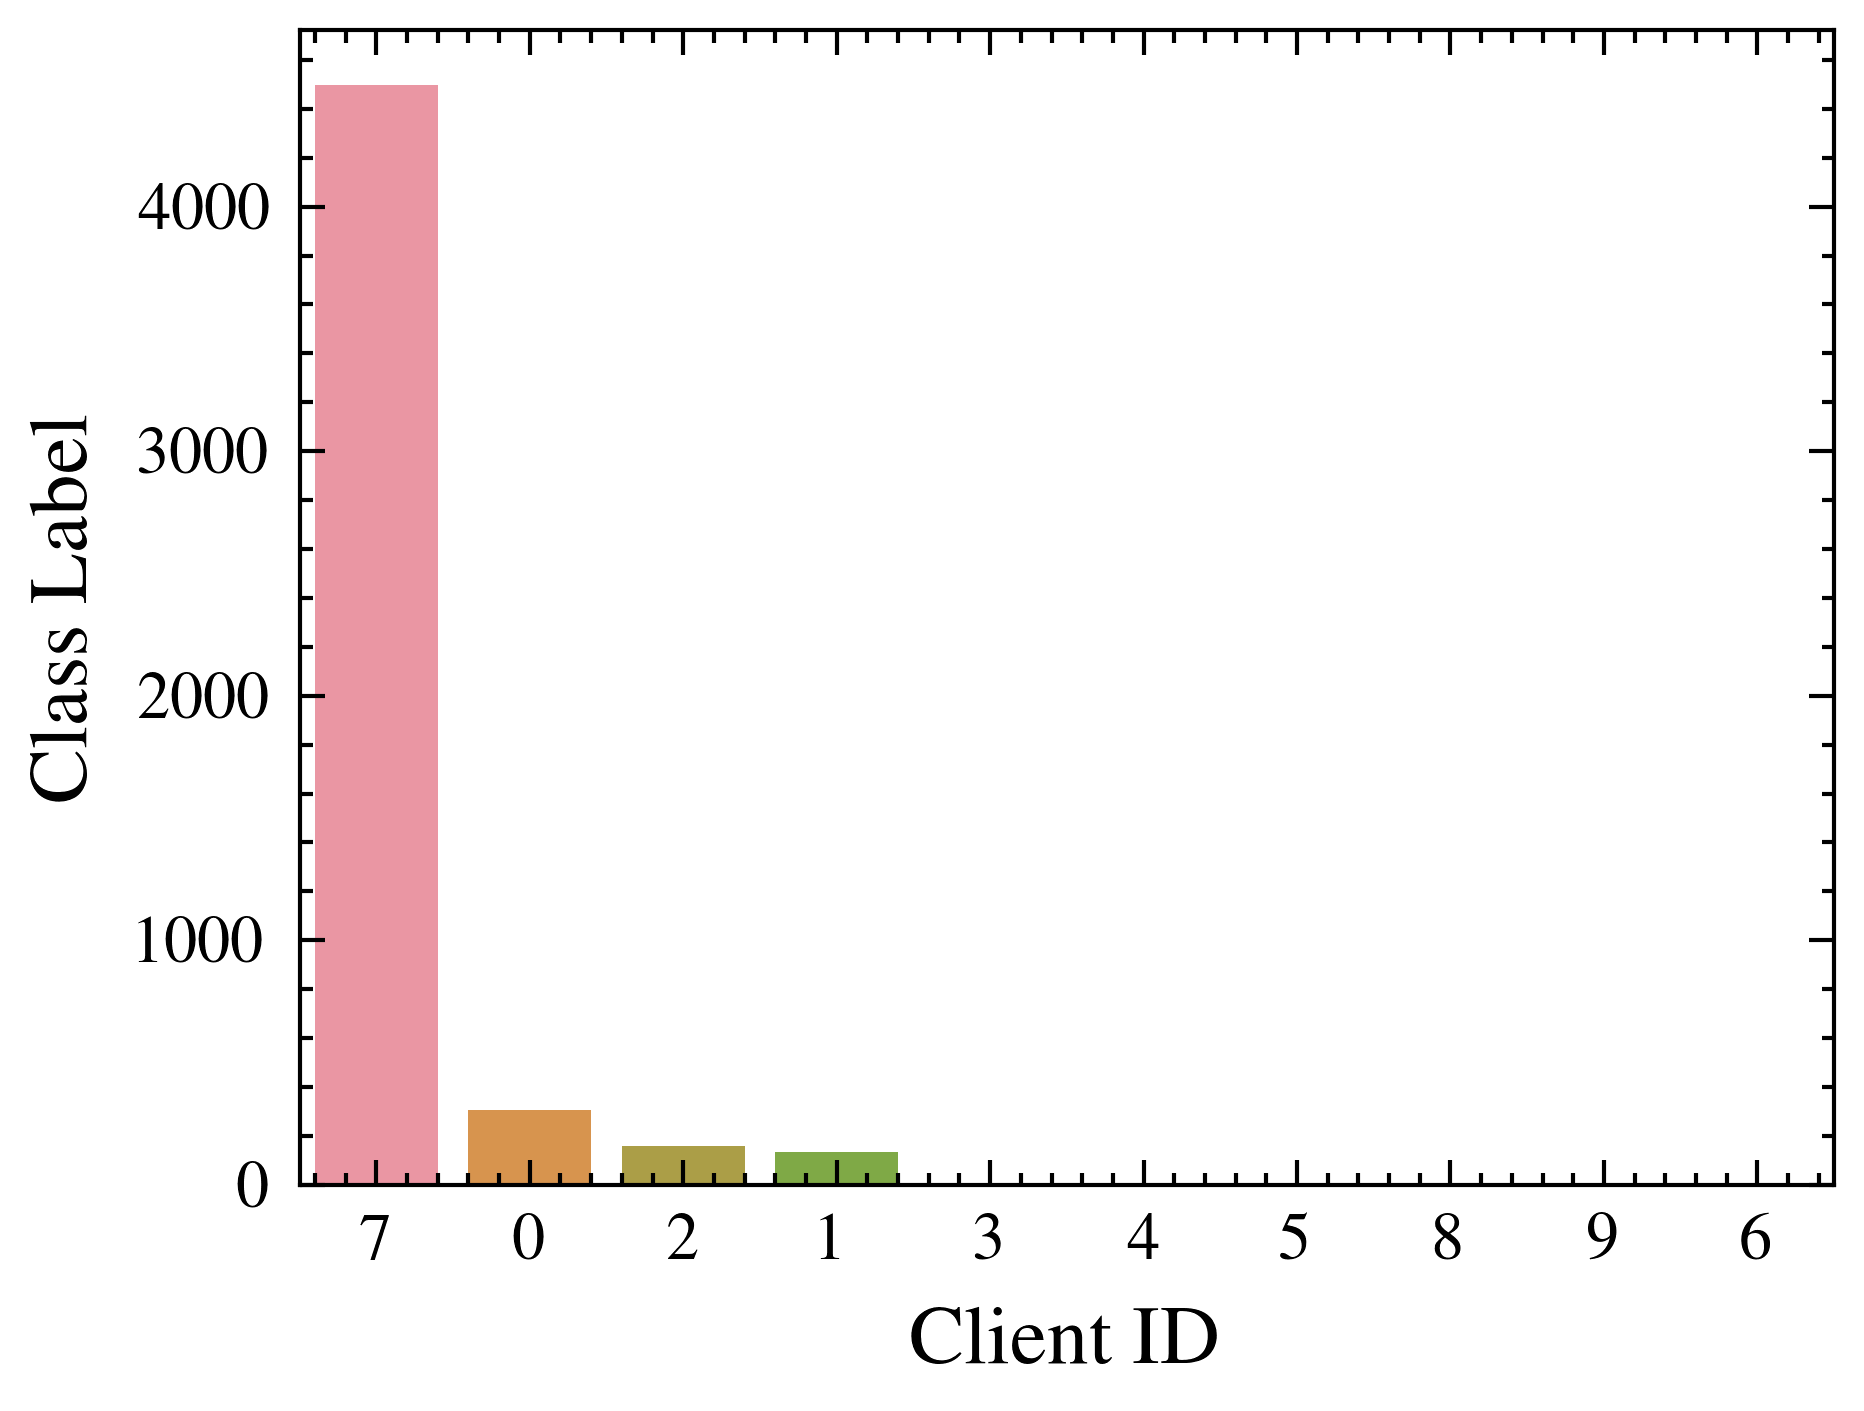

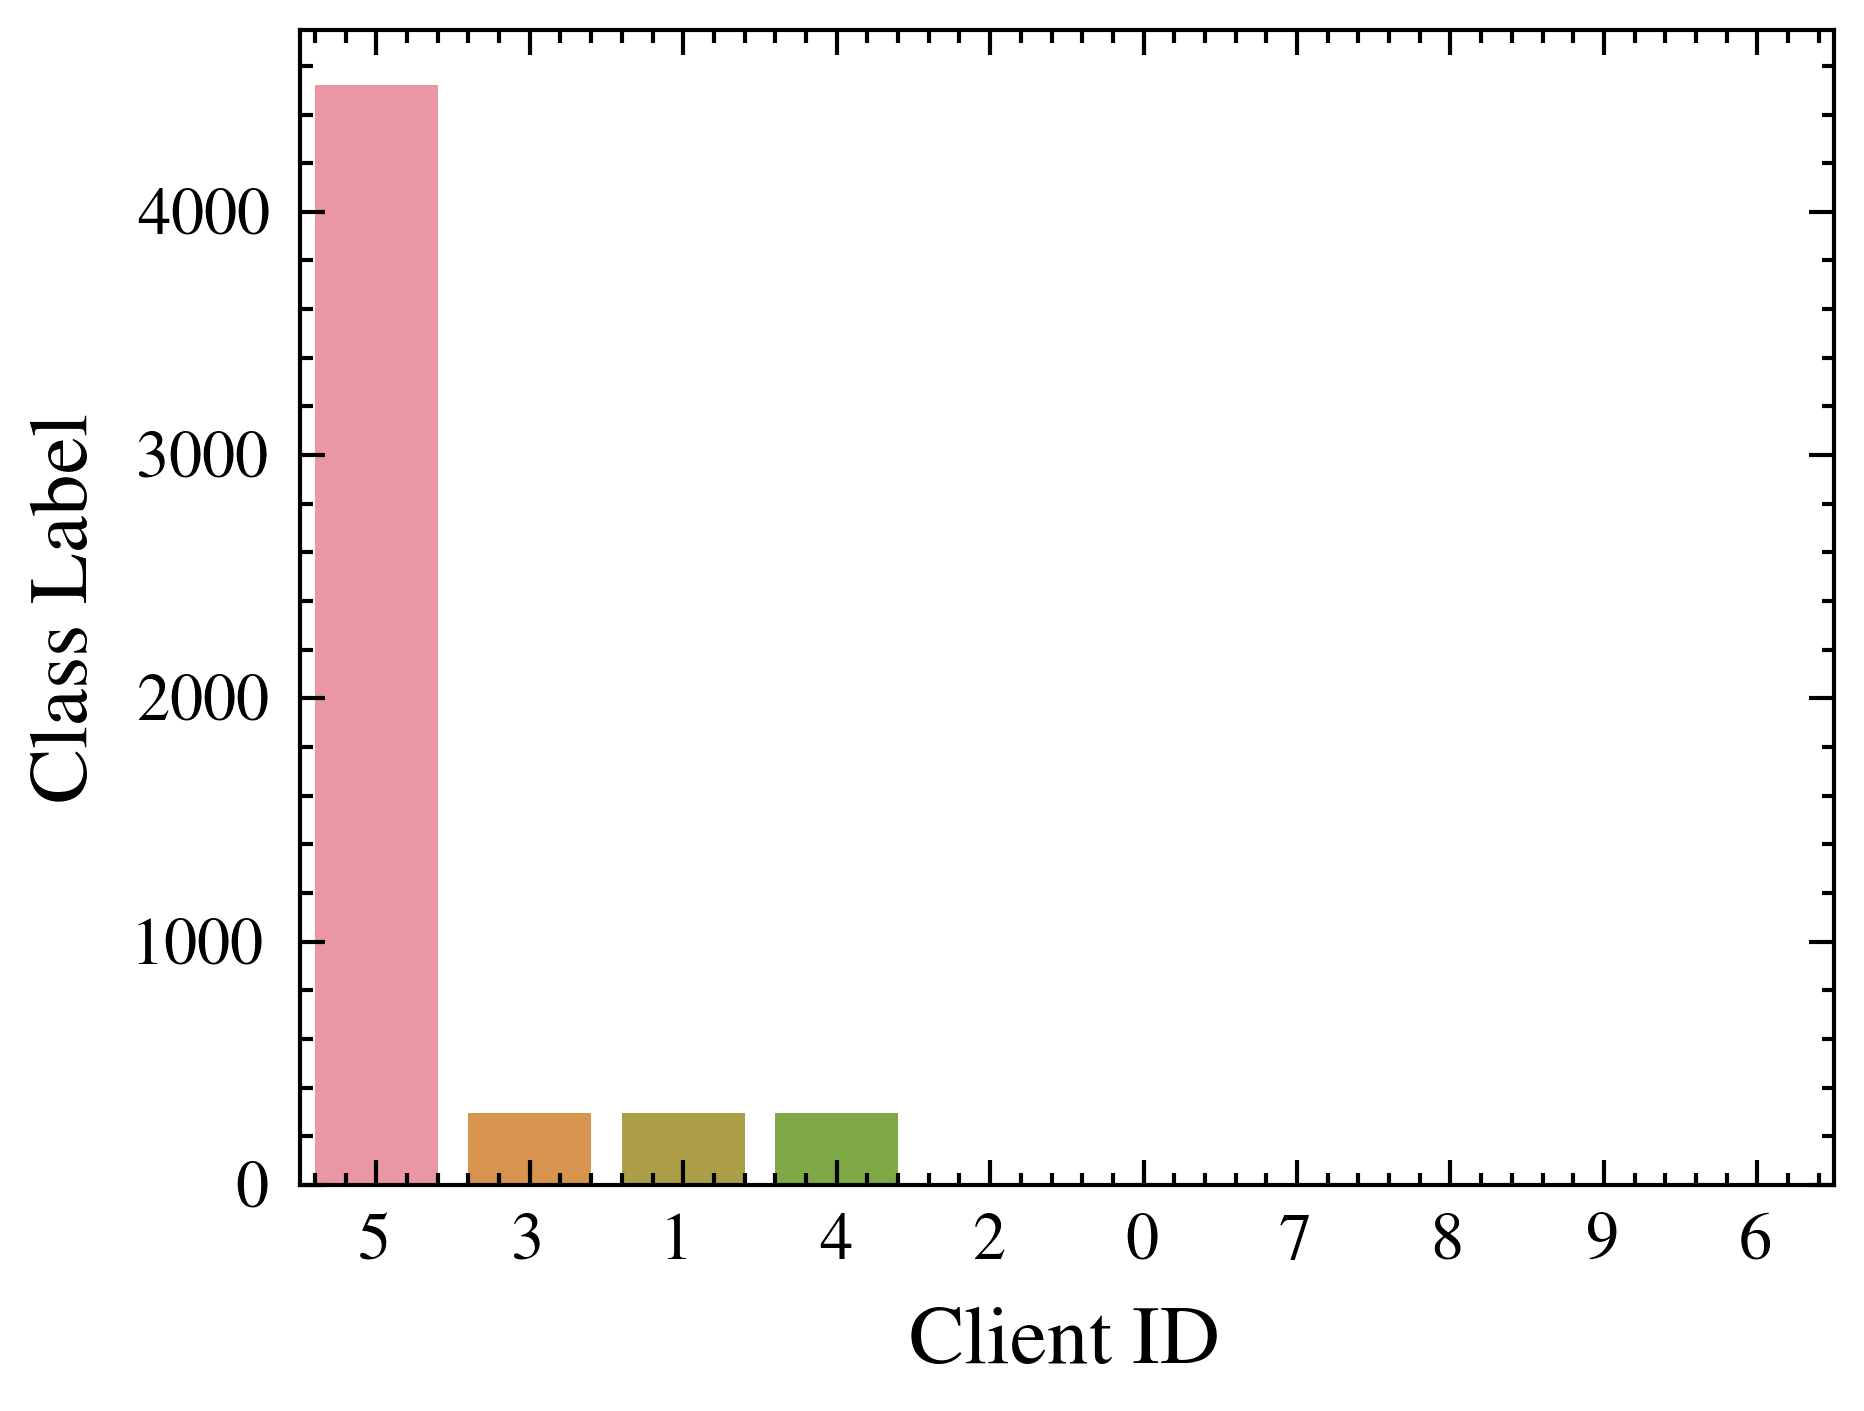

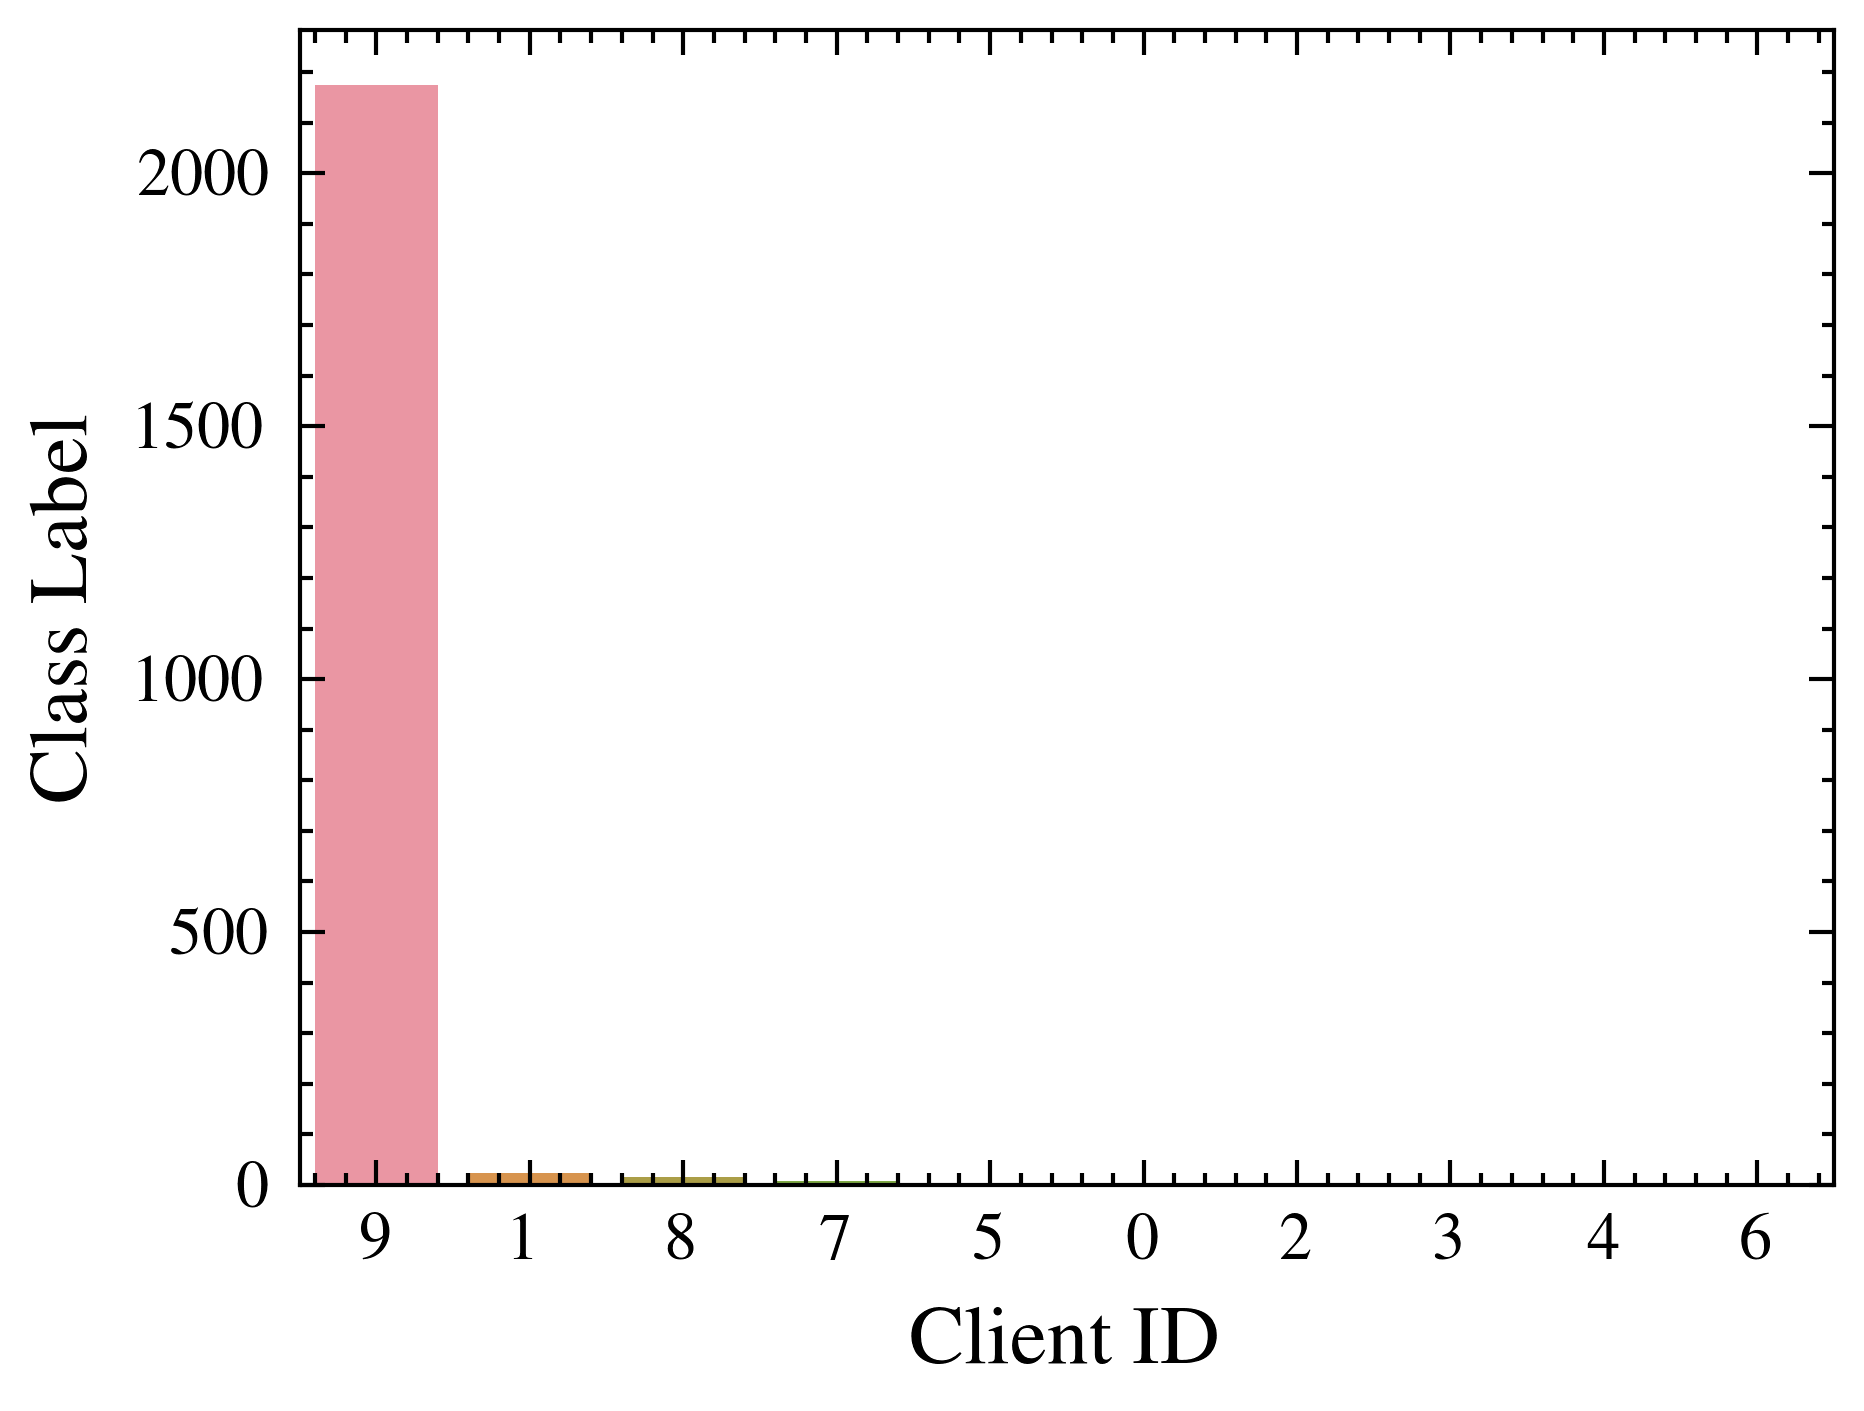

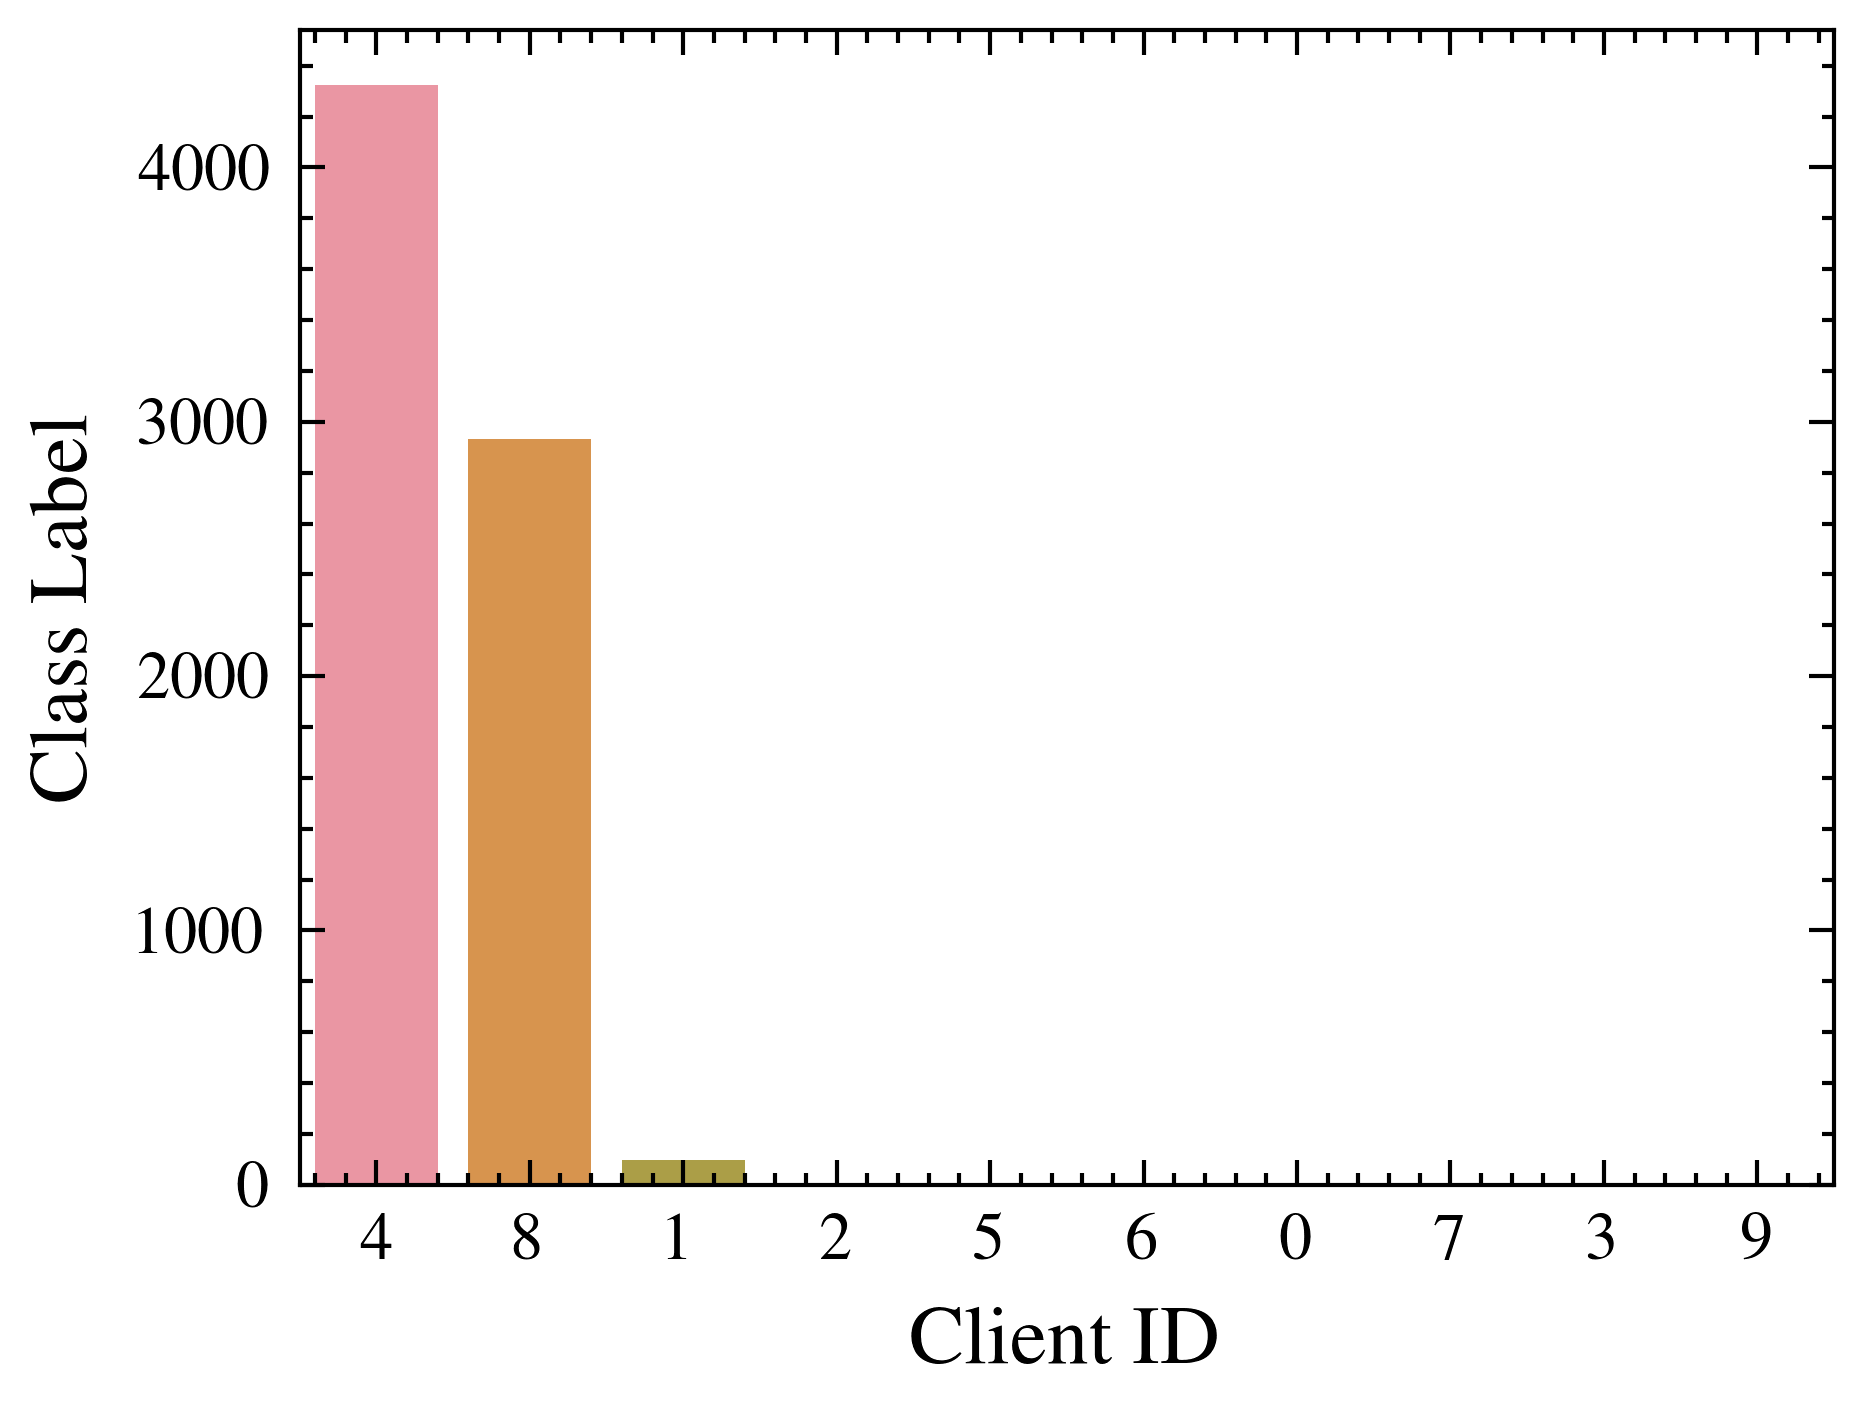

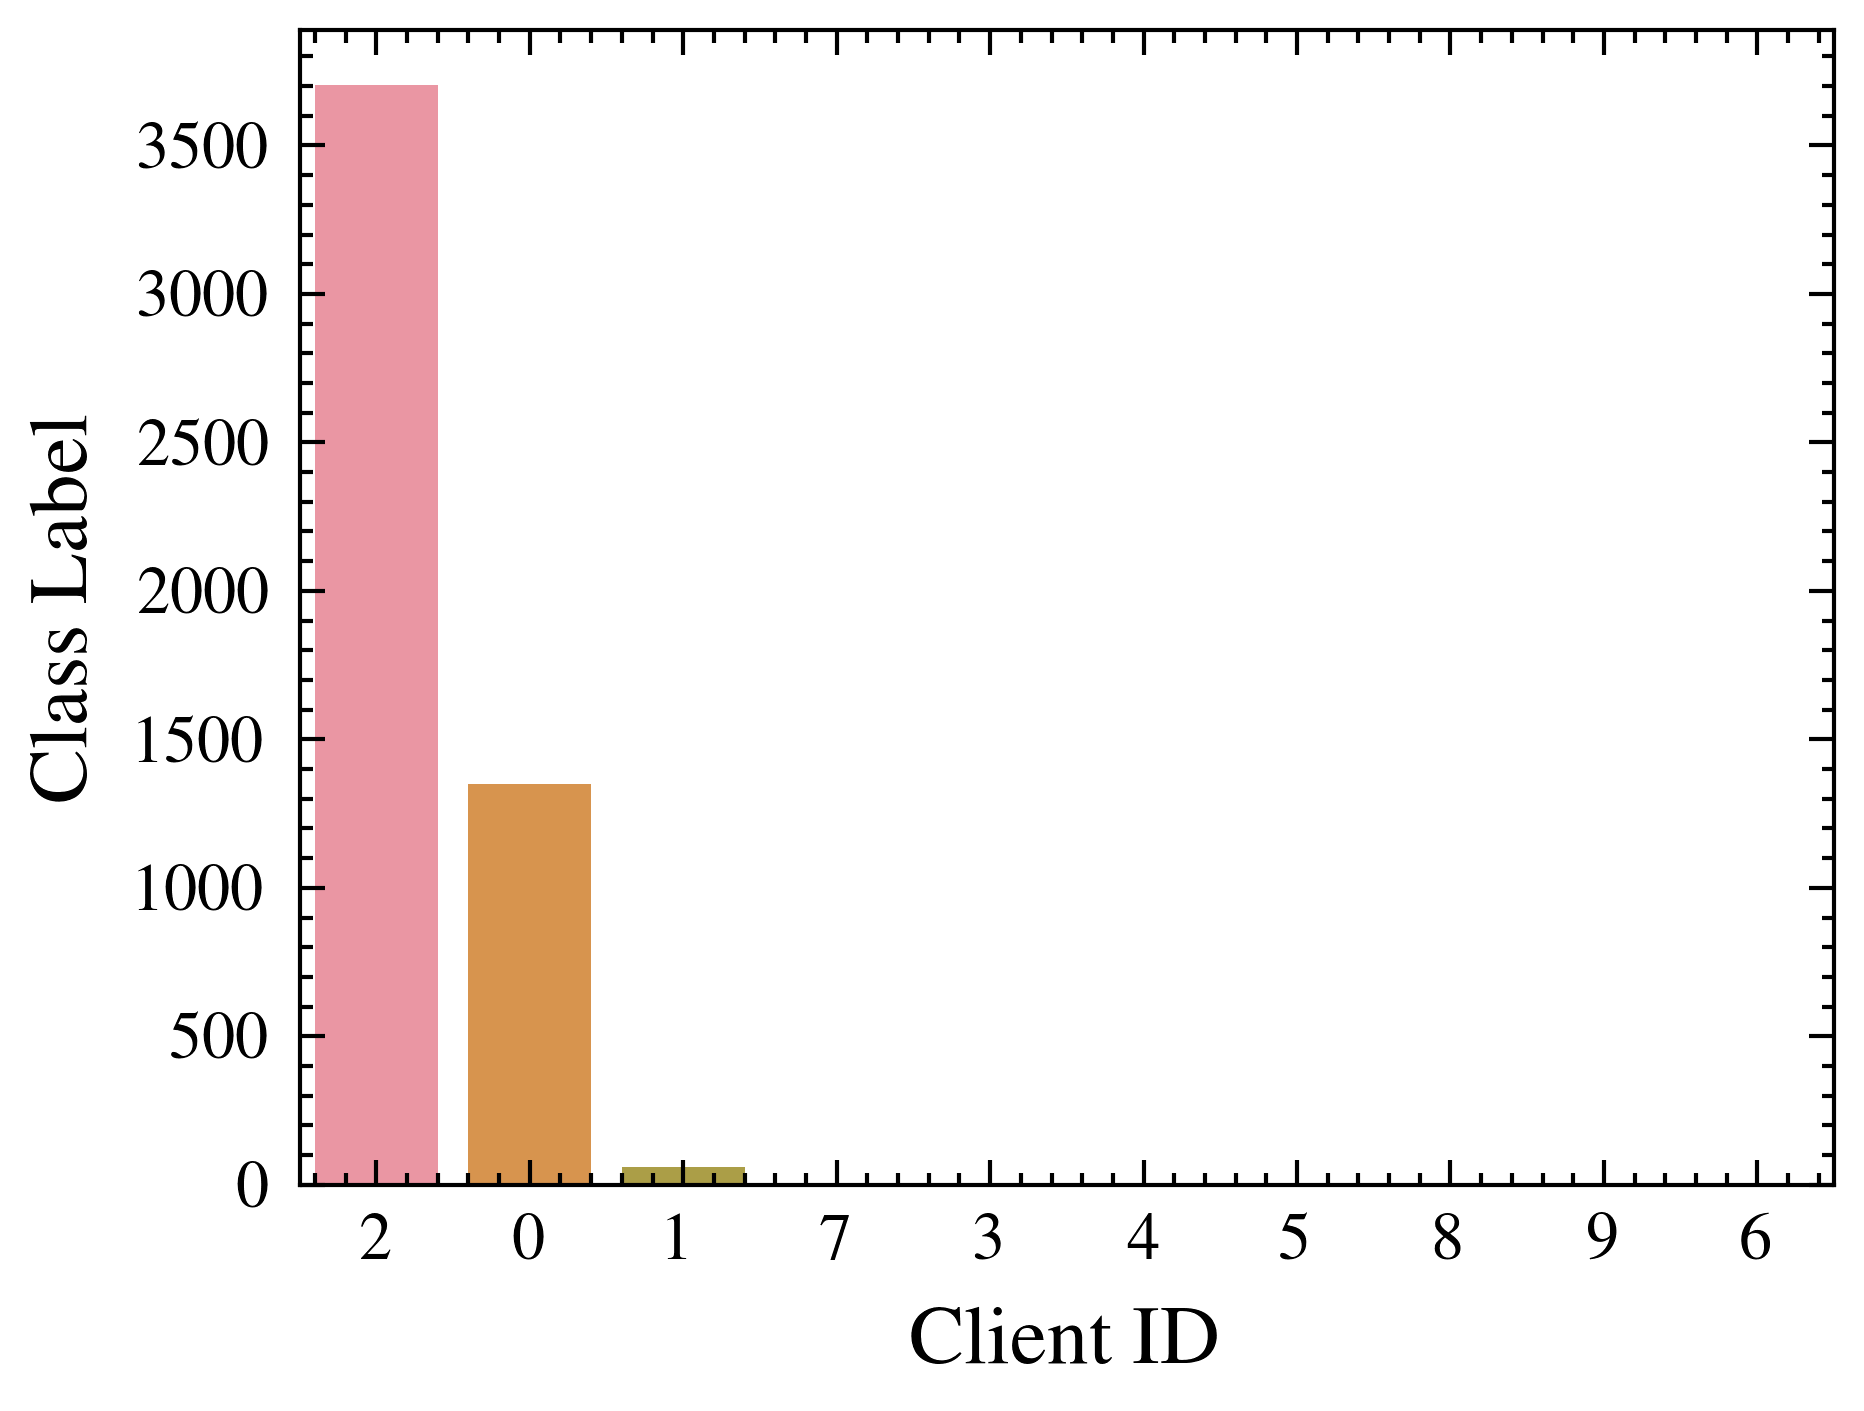

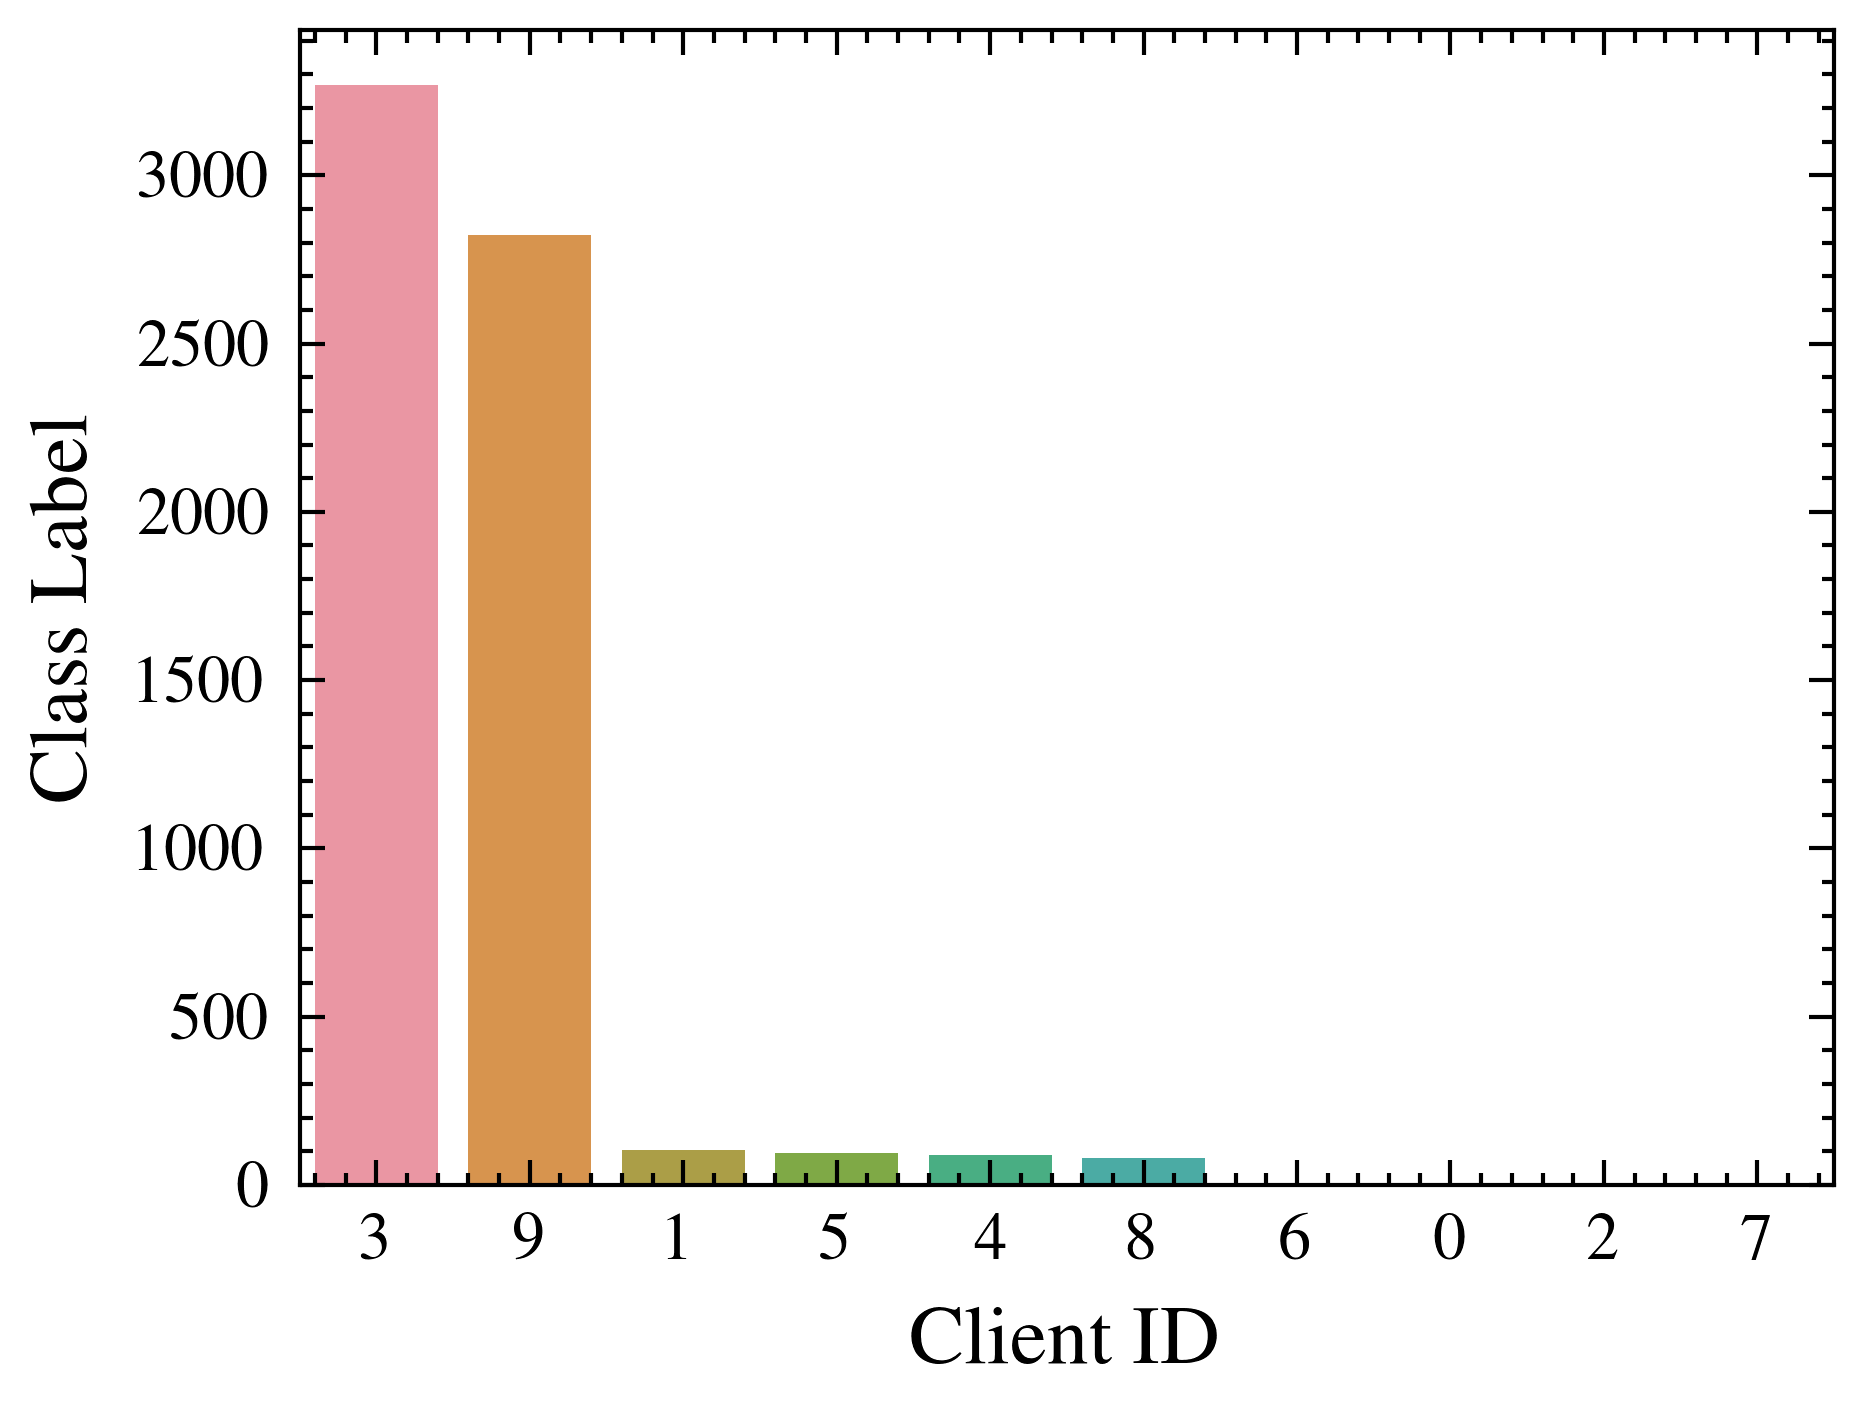

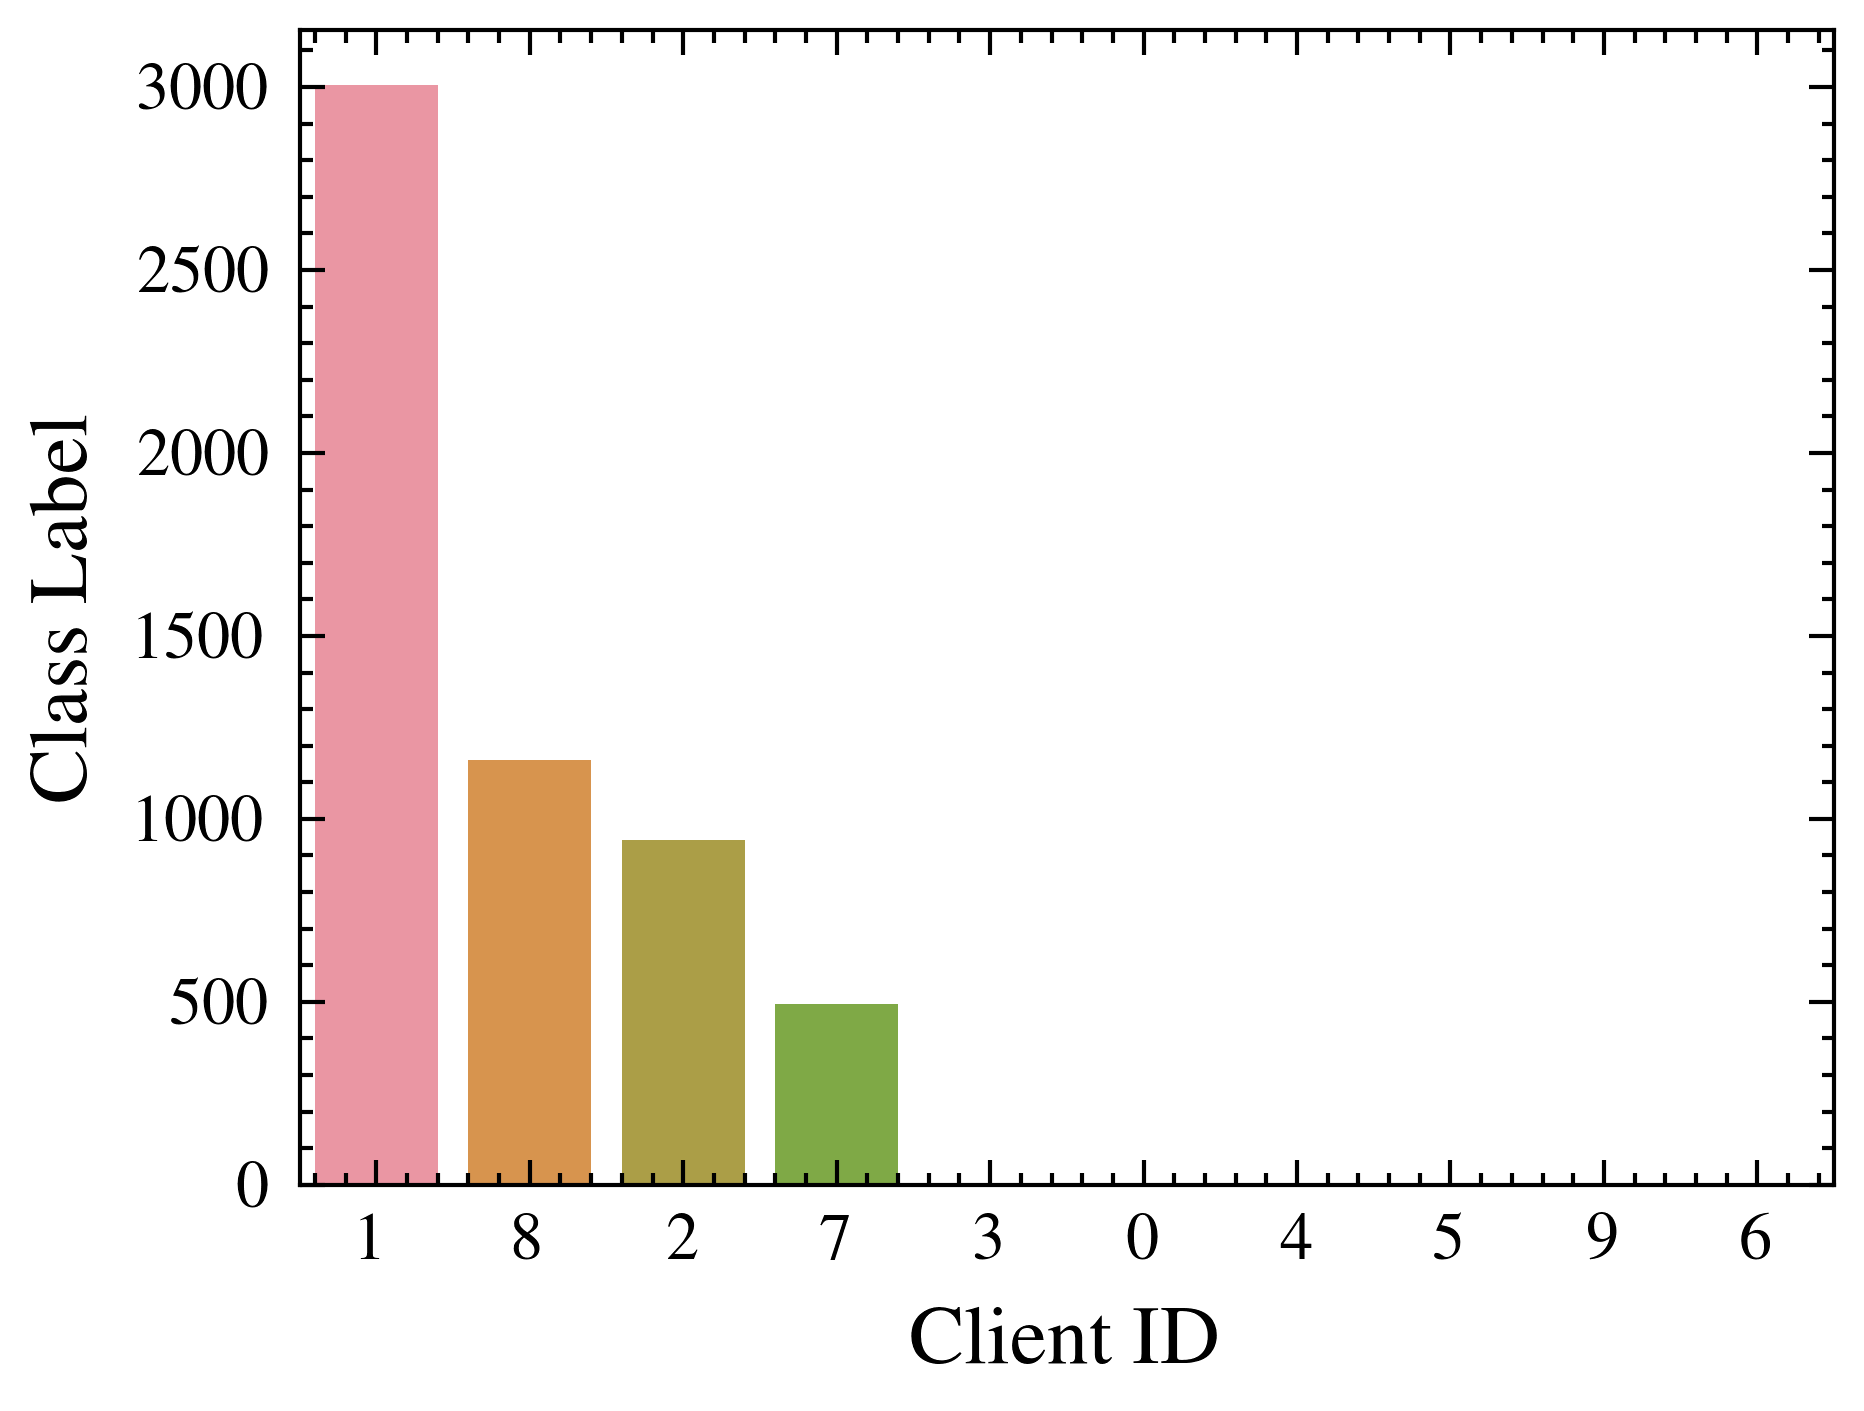

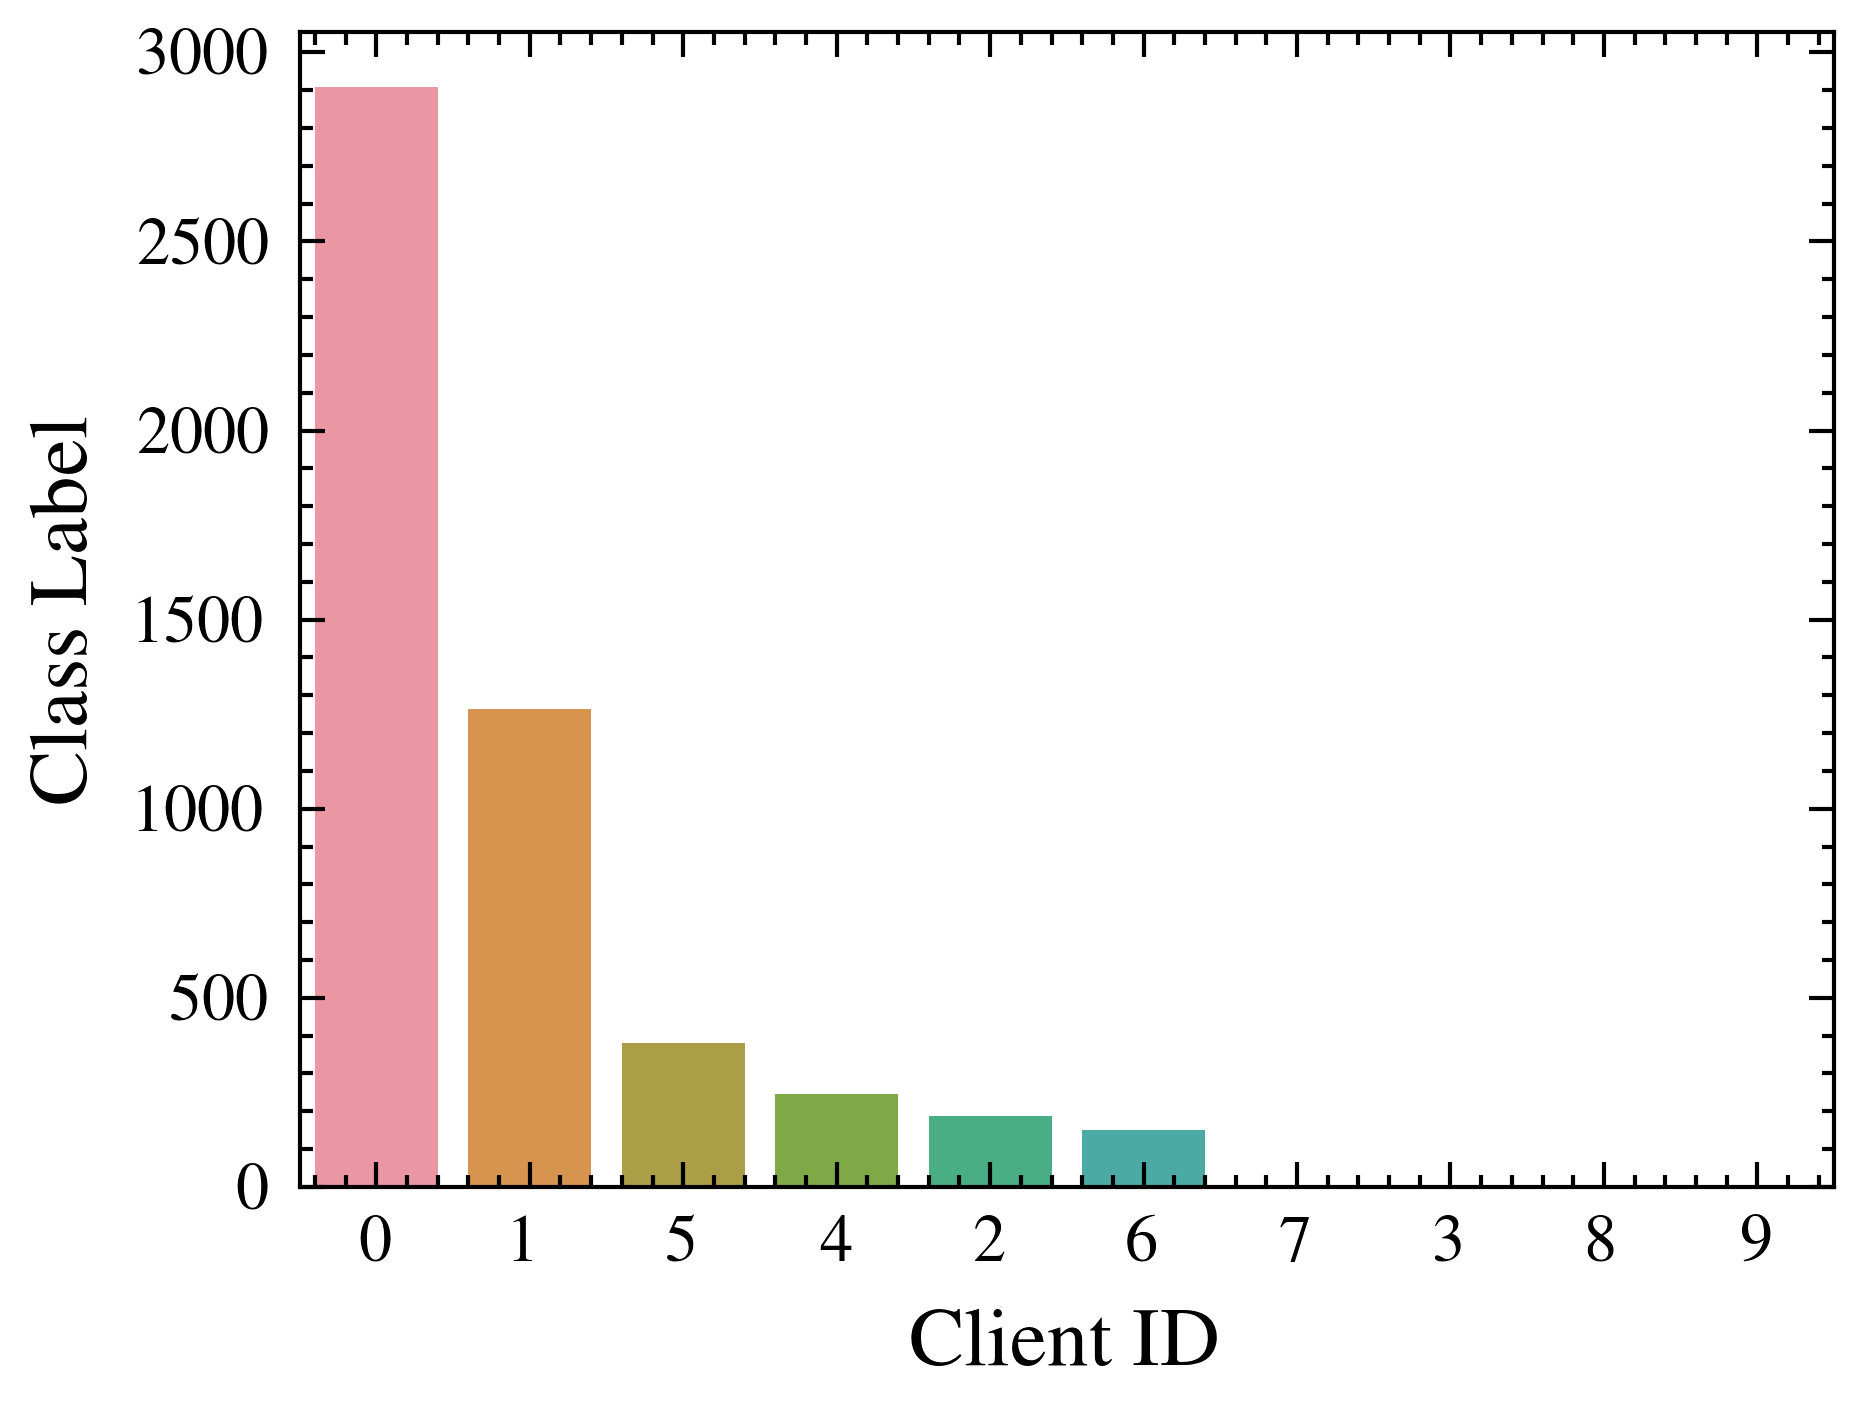

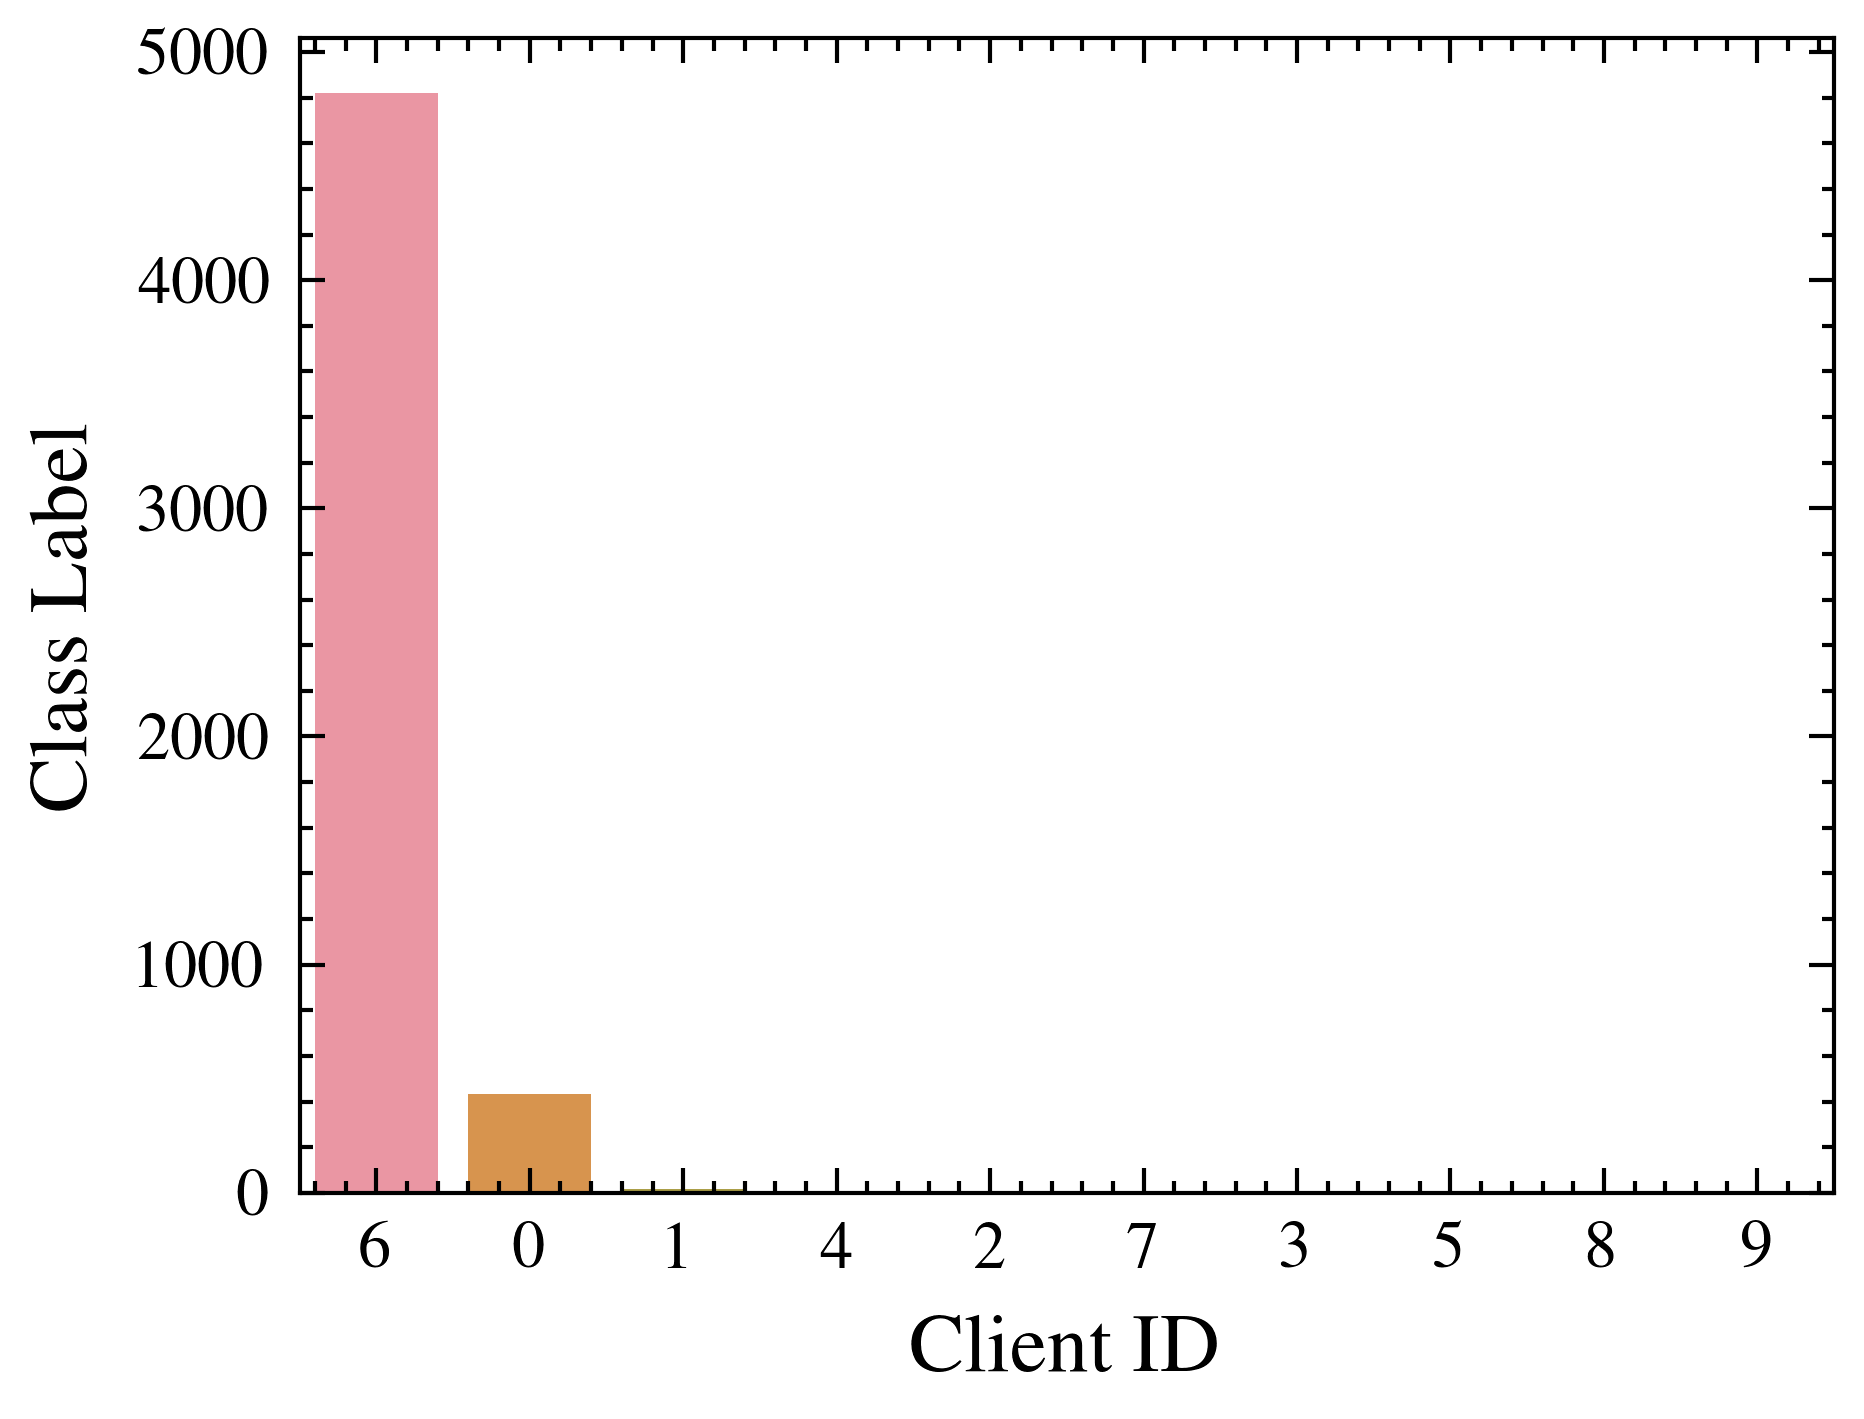

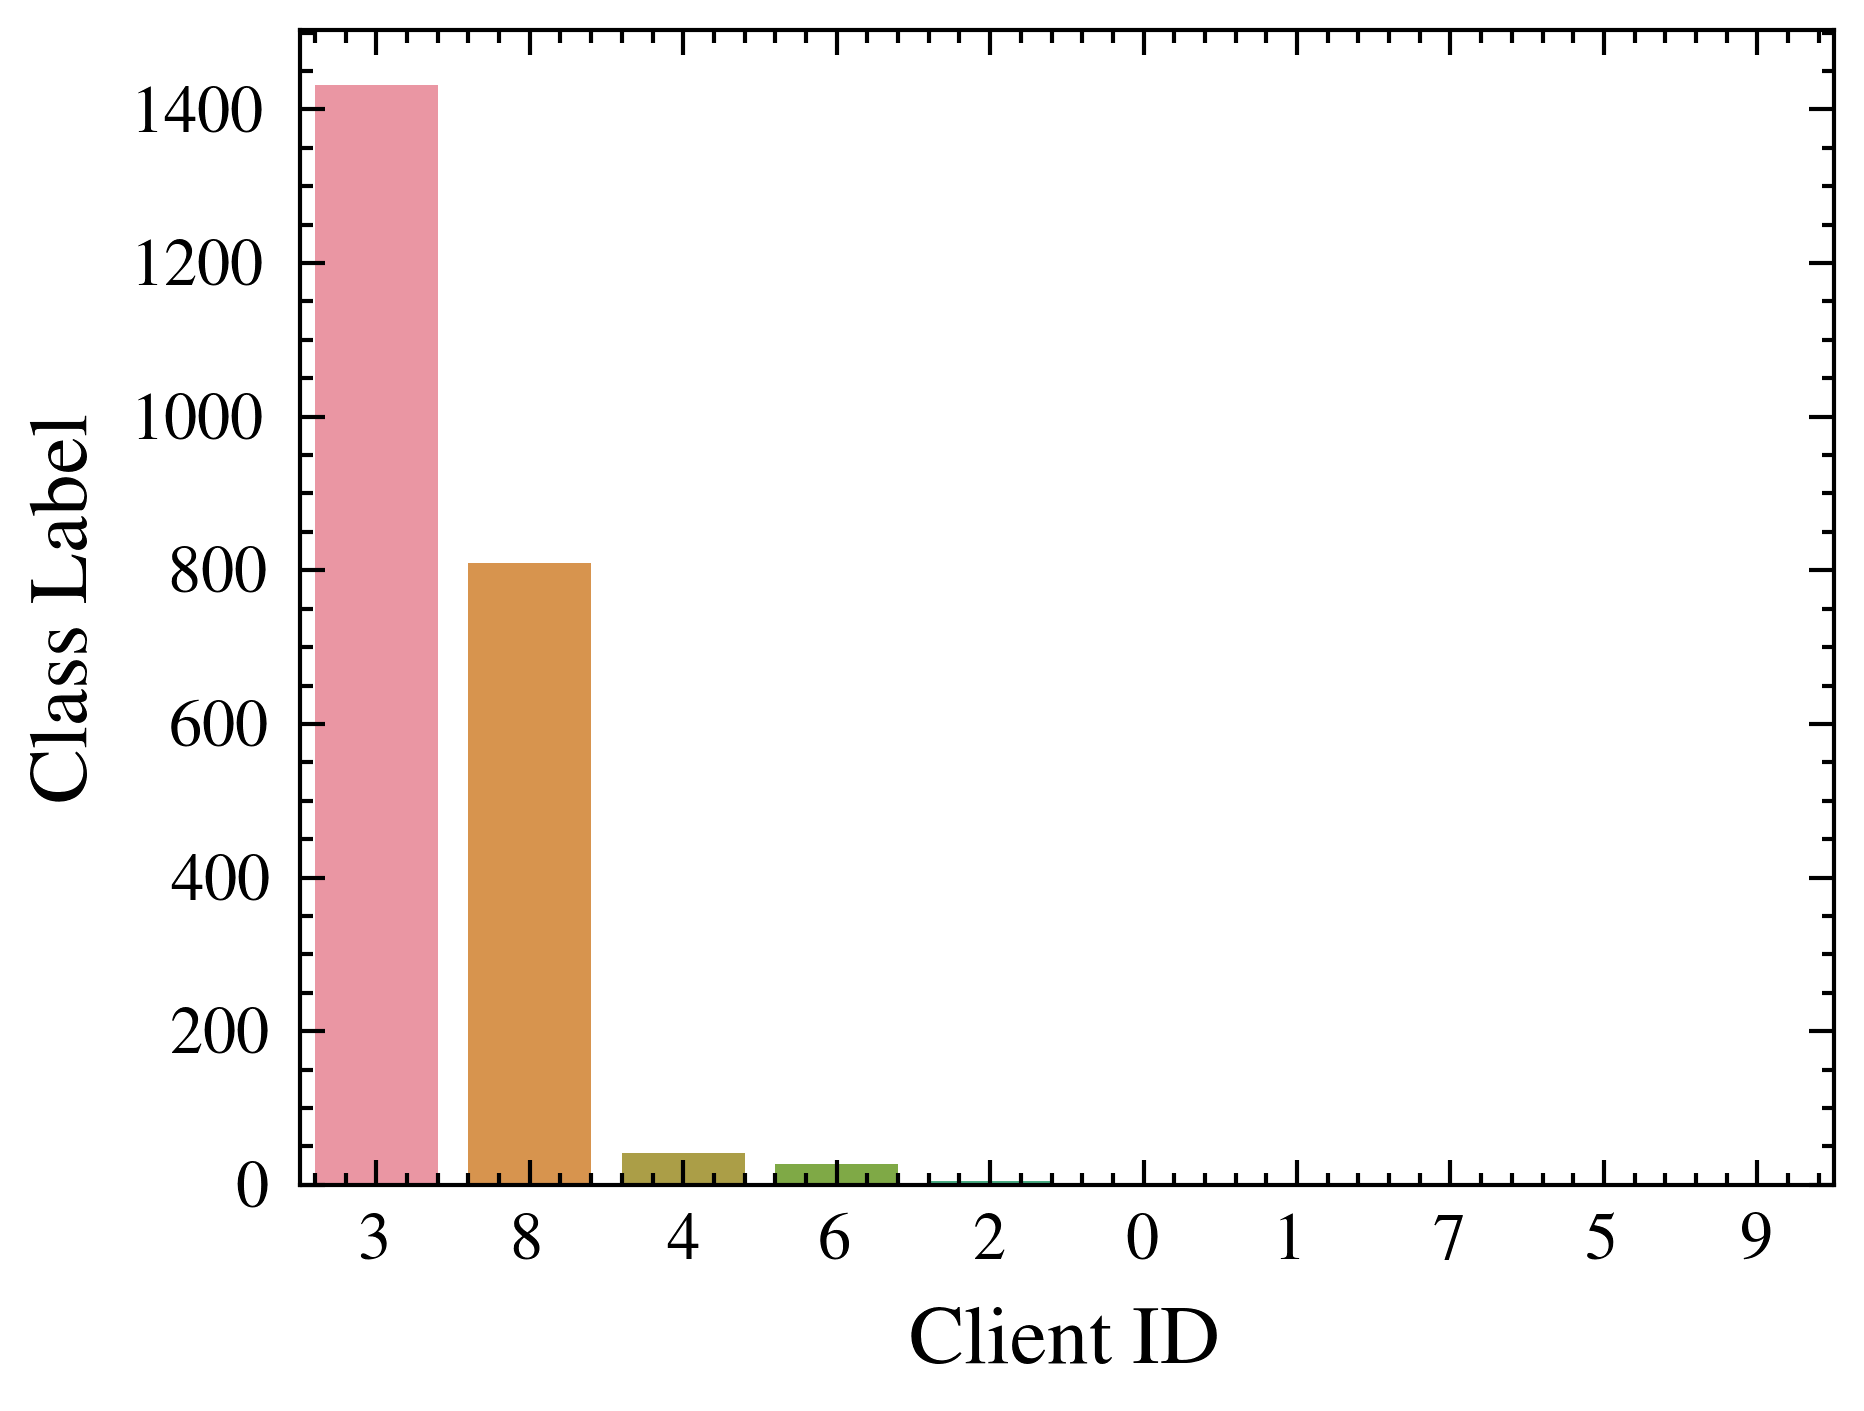

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['science','ieee','retro'])
import os
for client_id in range(10):
    df_temp = df[client_id].fillna(0)
    s = sns.barplot(x=df_temp.index,y=df_temp.values,order = df_temp.sort_values(ascending=False).index)
    # s.set_ylim(5000)
    s.set_xlabel('Client ID', fontsize=10)
    s.set_ylabel('Class Label', fontsize=10)
    plt.savefig(os.path.join("../saved/")+"infos_clients_"+str(client_id)+"_01.pdf",dpi = 300)
    plt.show()